**Download** (right-click, save target as ...) this page as a jupyterlab notebook [Lab26-TH](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab26/Lab26-TH.ipynb)

___

# <font color=darkred>Exercise Set 26: Regression Models </font>

**Medrano, Giovanni**

**R11521018**

ENGR 1330 Exercise Set 26 - Homework

___


### Exercise: 
In the [http://54.243.252.9/engr-1330-webroot/4-Databases/CarsDF.csv](http://54.243.252.9/engr-1330-webroot/4-Databases/CarsDF.csv) file, you will find a dataset with information about cars and motorcycles including their age, kilometers driven (mileage), fuel economy, enginer power, engine volume, and selling price. Follow the steps and answer the questions. <br>

- Step1: Read the "CarsDF.csv" file as a dataframe. Explore the dataframe and in a markdown cell briefly describe it in your own words. <br>
- Step2: Calculate and compare the correlation coefficient of the "selling price" with all the other parameters (execpt for "name", of course!). In a markdown cell, explain the results and state which parameters have the strongest and weakest relationship with "selling price" of a vehicle. 
- Step3: Use linear regression modeling in primitive python and VISUALLY assess the quality of a linear fit with Age as the predictor, and selling price as outcome. Explain the result of this analysis in a markdown cell.
- Step4: Use linear regression modeling with statsmodels and VISUALLY assess the quality of a linear fit with fuel economy as the predictor, and selling price as outcome. Explain the result of this analysis in a markdown cell.
- Step5: Use linear regression modeling with statsmodels and VISUALLY assess the quality of a linear fit with engine volume as the predictor, and selling price as outcome. Explain the result of this analysis in a markdown cell.
- Step6: In a markdown cell, explain which of the three predictors in steps 3,4, and 5, was a better predictor (resulted in a better fit ) for selling price?
- Step7: Use multiple linear regression modeling with scikit-learn and use all the parameters (execpt for "name", of course!) to predict selling price. Then, use this model to predict the selling price of a car that has the following charactristics and decide whether this prediction is reliable in your opinion: 
    - 2 years old
    - has gone 17000 km
    - has fuel economy measure of 24.2 kmpl
    - has an engine power of 74 bhp
    - has en engine volume of 1260 CC

In [38]:
# code here
# Step1:
import requests # Module to process http/https requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression



remote_url="http://54.243.252.9/engr-1330-webroot/4-Databases/CarsDF.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('CarsDF.csv','wb').write(rget.content); # extract from the remote the contents, assign to a local file same name
# Step1B
# make into a dataframe
# whats in the dataframe
dfd = pd.read_csv('CarsDF.csv')
dfd.head()

,name,Age,km_driven,FuelEconomy_kmpl,engine_p,engine_v,selling_price
0,Maruti Swift Dzire VDI,6,145500,23.4,74.0,1248,450000
1,Skoda Rapid 1.5 TDI Ambition,6,120000,21.1,103.0,1498,370000
2,Honda City 2017-2020 EXi,14,140000,17.7,78.0,1497,158000
3,Hyundai i20 Sportz Diesel,10,127000,23.0,90.0,1396,225000
4,Maruti Swift VXI BSIII,13,120000,16.1,88.0,1298,130000


In [39]:
dfd.describe()

,Age,km_driven,FuelEconomy_kmpl,engine_p,engine_v,selling_price
count,7905.000000,7.905000e+03,7905.000000,7905.000000,7905.000000,7.905000e+03
mean,6.015939,6.918350e+04,19.397293,79.227577,1458.735484,6.498295e+05
std,3.863924,5.679403e+04,4.034584,23.035056,503.919358,8.136330e+05
min,0.000000,1.000000e+00,0.000000,32.000000,624.000000,2.999900e+04
25%,3.000000,3.500000e+04,16.700000,67.000000,1197.000000,2.700000e+05
50%,5.000000,6.000000e+04,19.300000,81.000000,1248.000000,4.500000e+05
75%,8.000000,9.520000e+04,22.300000,88.000000,1582.000000,6.900000e+05
max,26.000000,2.360457e+06,42.000000,280.000000,3604.000000,1.000000e+07


On Step1: <font color="red">
# The dataframe is filled with 7 colums and describes the

# vehicle Names, age, km driven, fueleconomy, enginep, enginey, and

# it includes the selling price of the vehicle.

# It is also filled with 7905 rows and the purpose is to compare the vehicles

# to see which is ideal.
</font>

In [40]:
# Step2:.
dfd.corr()

,Age,km_driven,FuelEconomy_kmpl,engine_p,engine_v,selling_price
Age,1.000000,0.428541,-0.327189,-0.096420,-0.018250,-0.412299
km_driven,0.428541,1.000000,-0.173003,-0.010078,0.206078,-0.222152
FuelEconomy_kmpl,-0.327189,-0.173003,1.000000,-0.143632,-0.577973,-0.127844
engine_p,-0.096420,-0.010078,-0.143632,1.000000,0.282820,0.278393
engine_v,-0.018250,0.206078,-0.577973,0.282820,1.000000,0.455679
selling_price,-0.412299,-0.222152,-0.127844,0.278393,0.455679,1.000000


On Step2: <font color="red">
# According to selling price the only variables that have a positive correlation are

# Engine power and Enginer volume and Engine volume has the highest positive corr.
    
# with selling price. The rest are all negative so the main driving factors of 

# selling price are engine power and engine volume.


</font>

In [41]:
#Step3:
a = dfd['Age']
sp = dfd['selling_price']

meanA = np.mean(a)
meanSp = np.mean(sp)
print(meanA, meanSp)

dfd['xycov'] = (dfd['Age'] - meanA) * (dfd['selling_price'] - meanSp)
dfd['xvar'] = (dfd['Age'] - meanA)**2
print('===========================')

b = dfd['xycov'].sum() / dfd['xvar'].sum()
alpha = meanSp - (b * meanA)

print('Beta =',b)
print('Alpha=',alpha)

6.015939278937381 649829.510056926
Beta = -86818.48239180523
Alpha= 1172124.2284155204


In [42]:
X = np.array(a)

ypred = alpha + b * X
print(ypred)

[651213.33406469 651213.33406469 -43334.52506975 ... 217120.92210566
 564394.85167288 564394.85167288]


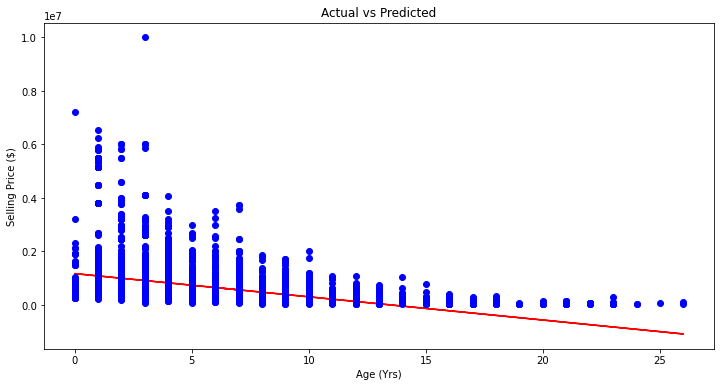

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(X, ypred, color="red")     
plt.plot(a, sp, 'ro', color="blue")   
plt.title('Actual vs Predicted')
plt.xlabel('Age (Yrs)')
plt.ylabel('Selling Price ($)')

plt.show();

On Step3: <font color="red">
# The older the car the lower the selling price becomes.
  
# Higher Age = Lower Selling Price
    
# Due to car damage, inflation, car wearing down, etc


</font>

In [53]:
# Step4:
f = dfd['FuelEconomy_kmpl']

model = smf.ols('sp ~ f', data = dfd)
model = model.fit()
model.params

Intercept    1.149923e+06
f           -2.578159e+04
dtype: float64

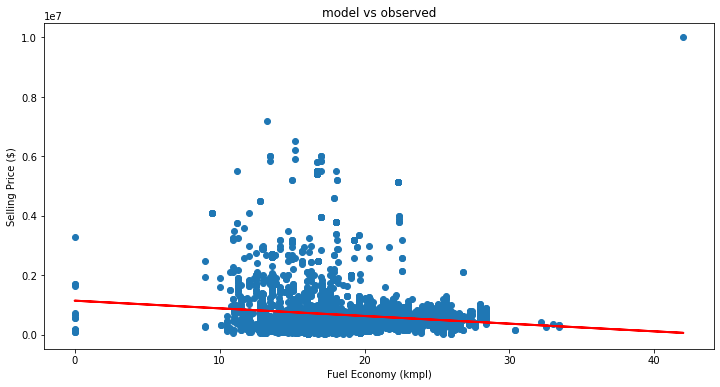

In [54]:
sp_p = model.predict()

plt.figure(figsize=(12, 6))
plt.plot(f, sp, 'o')   

plt.plot(f, sp_p, 'r', linewidth=2)   
plt.xlabel('Fuel Economy (kmpl)')
plt.ylabel('Selling Price ($)')
plt.title('model vs observed')

plt.show();

On Step4: <font color="red">
# According to the plot as fuel economy continues to grow
    
# The selling price begins to lower.
    
# Fuel economy increases = Selling Price lowers
  
# Although it is a low correlation.




</font>

In [46]:
# Step5:
e = dfd['engine_v']

model = smf.ols('sp ~ e', data = dfd)

model = model.fit()
model.params

Intercept   -423426.822869
e               735.744311
dtype: float64

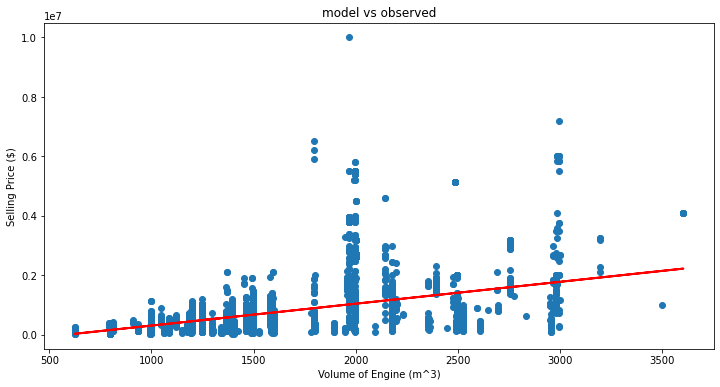

In [47]:
sepP = model.predict()


plt.figure(figsize=(12, 6))
plt.plot(e, sp, 'o')           
plt.plot(e, sepP, 'r', linewidth=2)  
plt.xlabel('Volume of Engine (m^3)')
plt.ylabel('Selling Price ($)')
plt.title('model vs observed')

plt.show();

On Step5: <font color="red">
# As the engine volume increased the selling price also increased

# Engine Volume Increase = Selling Price Increase
    
# People tend to enjoy cars with a bigger engine. 
        
</font>

In [48]:
# Step6:

On Step6: <font color="red">
# As a whole it seems as though step5 has the best fit

# Step 3 has a decent fit as well, but not as great as step5s
    
# Meaning Engine Volume being the predictor will lease to the best fit in terms of selling price.
</font>

In [55]:
#Step7:
predictors = ['Age', 'km_driven', 'FuelEconomy_kmpl','engine_p','engine_v']
X = dfd[predictors]
y = dfd['selling_price']
lm = LinearRegression()
model = lm.fit(X, y)
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = -349182.43008742994
betas = [-6.39699185e+04 -2.61785873e+00  6.27862738e+03  4.17269445e+03
  7.62703638e+02]


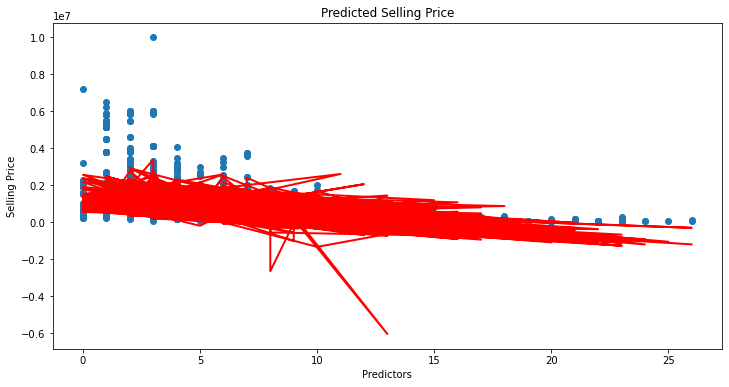

In [56]:
fitted = model.predict(X)


plt.figure(figsize=(12, 6))
plt.plot(dfd['Age'], dfd['selling_price'], 'o')           
plt.plot(dfd['Age'], fitted, 'r', linewidth=2)  
plt.xlabel('Predictors')
plt.ylabel('Selling Price')
plt.title('Predicted Selling Price')

plt.show();

In [57]:
final = [[2,17000,24.2,74,1260]]
finals =model.predict(final)
print('The Final Prediction for those parameters is:',finals)

The Final Prediction for those parameters is: [900102.89014124]
